In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img1 = cv2.imread('quote2.png') #abrir a imagem
img2 = cv2.imread('praia.jpg') #abrir a imagem

## Limiarização
Freqüentemente aplicada como um método de segmentação simples, é uma função de etapa que produz apenas dois valores, em relação aos pixels fora ou dentro das regiões de interesse


In [7]:
# Define um valor arbitrário de threshold
T = 100

# Todas as coordenadas serão avaliadas conforme a condicional
indL = np.where(img1 > T)

# Cria uma imagem com o mesmo tamanho da original
img1_thresh = np.zeros(img1.shape)

# muda para o valor 1 todos os pixels que possuem valor acima do threshold
img1_thresh[indL] = 1 



(-0.5, 639.5, 399.5, -0.5)

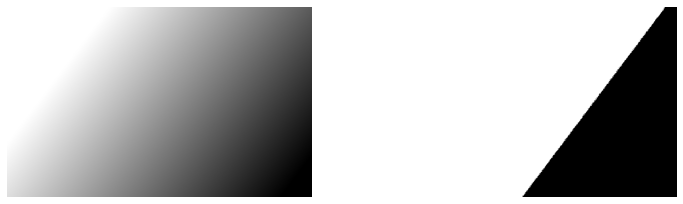

In [8]:
plt.figure(figsize=(12,12)) 
 
plt.subplot(121)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_thresh, cmap="gray")
plt.axis('off')

### Para a imagem 2

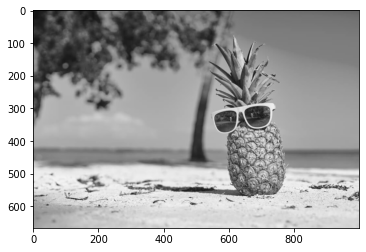

In [9]:
#converte BGR para escala cinza
img_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
#novamente, conversão apenas para plot
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB))

(-0.5, 999.5, 666.5, -0.5)

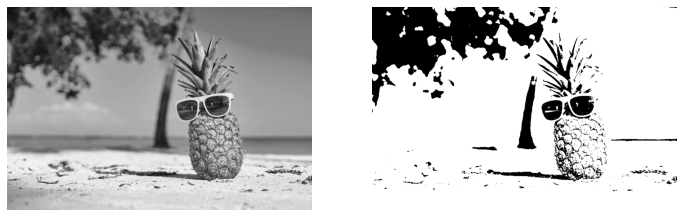

In [10]:
# Define um valor arbitrário de threshold
T = 100

# Todas as coordenadas serão avaliadas conforme a condicional
indL = np.where(img_pb > T)

# Cria uma imagem com o mesmo tamanho da original
img2_thresh = np.zeros(img_pb.shape)

# muda para o valor 1 todos os pixels que possuem valor acima do threshold
img2_thresh[indL] = 1 

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img_pb, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2_thresh, cmap="gray")
plt.axis('off')



### Com a biblioteca OpenCV tem vários tipos de threshold

(-0.5, 999.5, 666.5, -0.5)

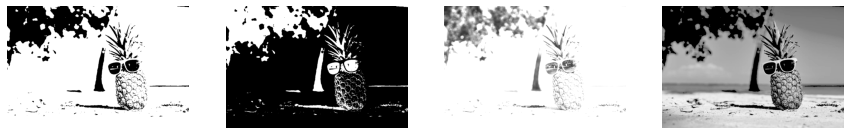

In [11]:

ret, thresh1 = cv2.threshold(img_pb,100,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_pb,100,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_pb,100,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_pb,100,255,cv2.THRESH_TOZERO)

plt.figure(figsize=(15,15)) 
plt.subplot(141)
plt.imshow(thresh1, cmap="gray")
plt.axis('off')
plt.subplot(142)
plt.imshow(thresh2, cmap="gray")
plt.axis('off')
plt.subplot(143)
plt.imshow(thresh3, cmap="gray")
plt.axis('off')
plt.subplot(144)
plt.imshow(thresh4, cmap="gray")
plt.axis('off')

# Segmentação por limiarização (Otsu)

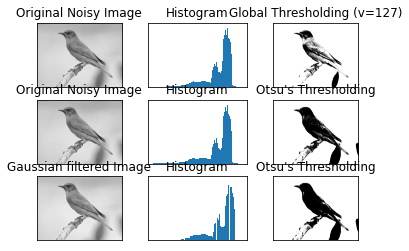

In [12]:
img = cv2.imread('bird.png',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Segmentação de imagens coloridas

(-0.5, 1399.5, 1049.5, -0.5)

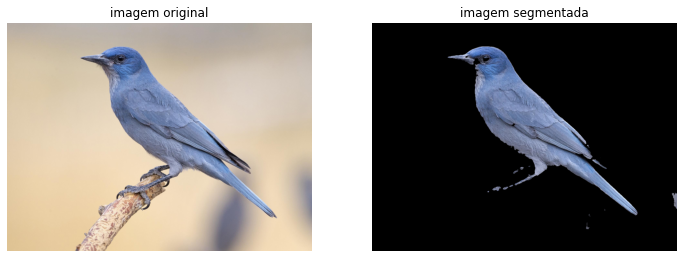

In [13]:
img = cv2.imread('bird.png')
blur = cv2.blur(img,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)

#estabelecer o limite ou os valores do intervalo para todos os
#pixels que queremos extrair.
low_blue = np.array([55, 0, 0])
high_blue = np.array([118, 255, 255])

#A “máscara” é basicamente nós colocando uma máscara 
#sobre todos os outros pixels que não estão em nosso
#intervalo de pixels descrito.
mask = cv2.inRange(hsv, low_blue, high_blue)
res = cv2.bitwise_and(img, img, mask= mask)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("imagem original")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("imagem segmentada")
plt.axis('off')


(-0.5, 719.5, 575.5, -0.5)

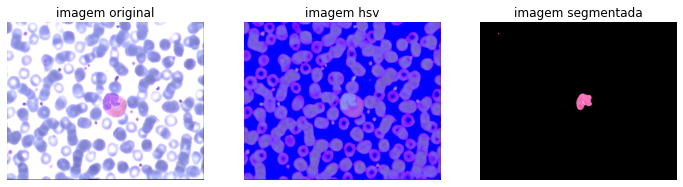

In [14]:
image = cv2.imread('5.bmp')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
blur = cv2.medianBlur(hsv ,11)

lower = np.array([132,113,223])
upper = np.array([140,153,255])

mask = cv2.inRange(blur, lower, upper)
res = cv2.bitwise_and(image,image, mask= mask)            


plt.figure(figsize=(12,12)) 
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("imagem original")
plt.axis('off')
plt.subplot(132)
plt.imshow(hsv, cmap="gray", vmin=0, vmax=255)
plt.title("imagem hsv")
plt.axis('off')
plt.subplot(133)
plt.imshow(res, cmap="gray", vmin=0, vmax=255)
plt.title("imagem segmentada")
plt.axis('off')


In [15]:
image = cv2.imread('calcadagrama.jpg')
imgYCC = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
blur = cv2.medianBlur(imgYCC ,11)

lower = np.array([40, 40, 95])
upper = np.array([190,125,120])

mask = cv2.inRange(blur, lower, upper)
res = cv2.bitwise_and(image,image, mask= mask)       

(-0.5, 399.5, 297.5, -0.5)

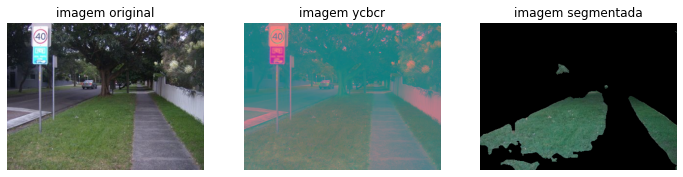

In [16]:
plt.figure(figsize=(12,12)) 
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("imagem original")
plt.axis('off')
plt.subplot(132)
plt.imshow(imgYCC, cmap="gray", vmin=0, vmax=255)
plt.title("imagem ycbcr")
plt.axis('off')
plt.subplot(133)
plt.imshow(res, cmap="gray", vmin=0, vmax=255)
plt.title("imagem segmentada")
plt.axis('off')

In [17]:
image = cv2.imread('calcadagrama.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
blur = cv2.medianBlur(hsv ,11)

lower = np.array([40, 40, 95])
upper = np.array([190,125,120])

mask = cv2.inRange(blur, lower, upper)
res = cv2.bitwise_and(image,image, mask= mask)

(-0.5, 399.5, 297.5, -0.5)

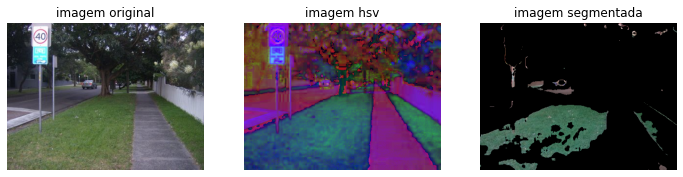

In [18]:
plt.figure(figsize=(12,12)) 
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("imagem original")
plt.axis('off')
plt.subplot(132)
plt.imshow(hsv, cmap="gray", vmin=0, vmax=255)
plt.title("imagem hsv")
plt.axis('off')
plt.subplot(133)
plt.imshow(res, cmap="gray", vmin=0, vmax=255)
plt.title("imagem segmentada")
plt.axis('off')


### Segmentação de imagem colorida usando K-means

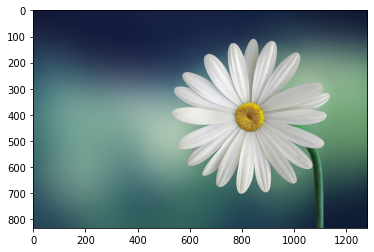

In [19]:
# load image
img = cv2.imread('flor.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Vamos usar a função cv2.kmeans(), que usa uma matriz 2D como entrada e, como nossa imagem original é 3D (largura, altura e profundidade de 3 valores RGB), precisamos achatar a altura e a largura em um vetor único de pixels (3 valores RGB):

In [20]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [21]:
#Vamos imprimir os pixels resultantes
print(pixel_values.shape)

(1066240, 3)


Como esperado, isso resulta do nivelamento de uma imagem de alta resolução.

Vamos parar o agrupamento quando algum número de iterações for excedido (digamos 100), ou se os clusters se moverem menos que algum valor epsilon (vamos escolher 0,2 aqui), o código abaixo define os critérios de parada no OpenCV:

In [22]:
# define stopping criteria, number of clusters(K) and apply kmeans()
# TERM_CRITERIA_EPS : stop when the epsilon value is reached
# TERM_CRITERIA_MAX_ITER:  stop when Max iteration is reached
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

Se você observar a imagem, há três cores (verde para fundo e caule, branco para as pétalas e amarelo para o miolo). Como resultado, usaremos três clusters para esta imagem:

In [23]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

* labels é o rótulo do cluster para cada pixel que é 0, 1 ou 2 (já que k = 3), 
* centers referem-se aos pontos centrais (o valor de cada centróide).

cv2.KMEANS_RANDOM_CENTERS apenas indica OpenCV para atribuir aleatoriamente os valores dos clusters inicialmente.

Se você olhar novamente para o código, não mencionamos que convertemos os valores de pixel da imagem nivelada em flutuantes; Fizemos isso porque cv2.kmeans() espera isso, vamos convertê-los de volta para valores de pixel de 8 bits:

In [24]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

Agora vamos construir a imagem segmentada

In [25]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

(-0.5, 1279.5, 832.5, -0.5)

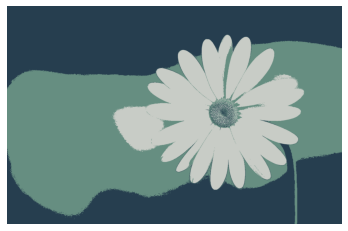

In [26]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)
# show the image
plt.imshow(segmented_image)
plt.axis('off')

In [27]:
# number of clusters (K)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

(-0.5, 1279.5, 832.5, -0.5)

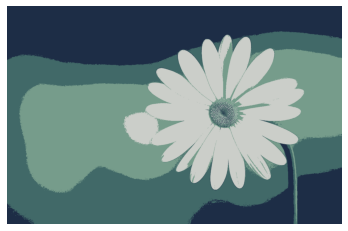

In [28]:
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
plt.imshow(segmented_image)
plt.axis('off')

(-0.5, 1279.5, 832.5, -0.5)

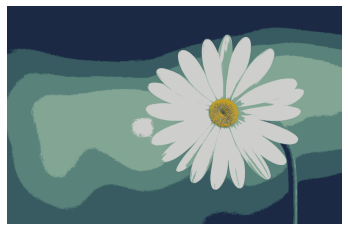

In [29]:
# number of clusters (K)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
plt.imshow(segmented_image)
plt.axis('off')

Também podemos desabilitar alguns clusters na imagem. Por exemplo, vamos desabilitar o cluster número 2 e mostrar a imagem original:

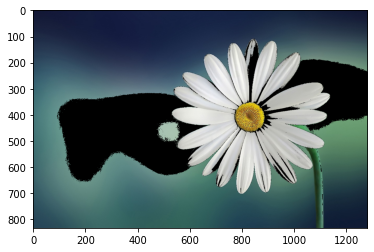

In [30]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(img)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(img.shape)
# show the image
plt.imshow(masked_image)

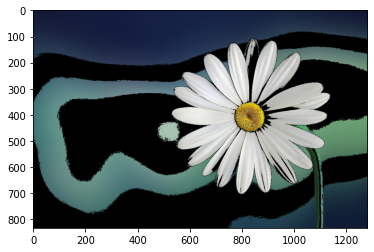

In [31]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image2 = np.copy(masked_image)
# convert to the shape of a vector of pixel values
masked_image2 = masked_image2.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 4
masked_image2[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image2 = masked_image2.reshape(img.shape)
# show the image
plt.imshow(masked_image2)

(-0.5, 1279.5, 832.5, -0.5)

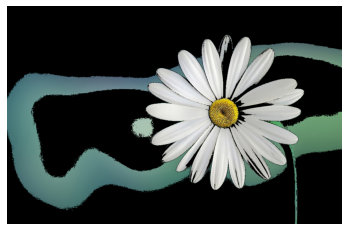

In [32]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image3 = np.copy(masked_image2)
# convert to the shape of a vector of pixel values
masked_image3 = masked_image3.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image3[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image3 = masked_image3.reshape(img.shape)
# show the image
plt.imshow(masked_image3)
plt.axis('off')